In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('for_text.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия,ЗП_сред,ЗП_сред_RUB,Локация_2,Сфера
0,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик",125000.0,125000.0,Москва,Прога
1,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик",150000.0,150000.0,Москва,Прога
2,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик",105000.0,105000.0,Другое,Прога
3,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик",130000.0,130000.0,Санкт-Петербург,Прога
4,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик,75000.0,75000.0,Москва,Аналитика


## Гипотеза №1

ЗП имеет лог-нормальное распредление

Посмотрим на логорифм ЗП

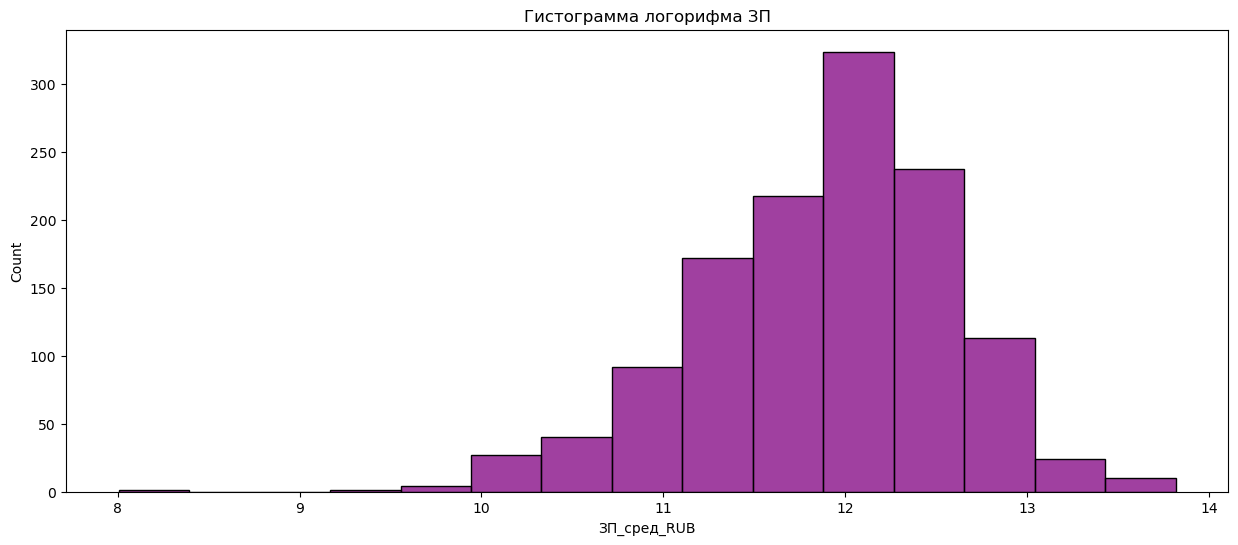

In [4]:
plt.figure(figsize=(15,6))
sns.histplot(np.log(df['ЗП_сред_RUB']), bins=15, color='purple') #возьмем логорифм заработной платы
plt.title('Гистограмма логорифма ЗП');

Удалим выбросы

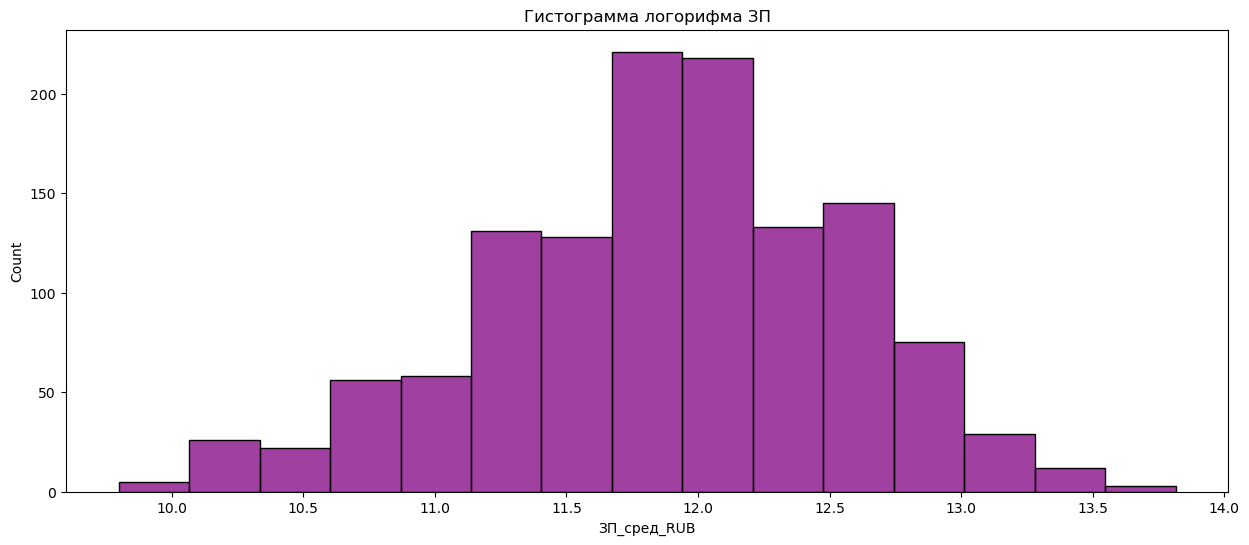

In [5]:
df_zp = df['ЗП_сред_RUB']
df_zp_cleaned = np.log(df_zp[np.log(df_zp) > 9.5])

plt.figure(figsize=(15,6))
sns.histplot(df_zp_cleaned, bins=15, color='purple')
plt.title('Гистограмма логорифма ЗП');

Похоже на нормальное распредление. Посмотрим на график QQ

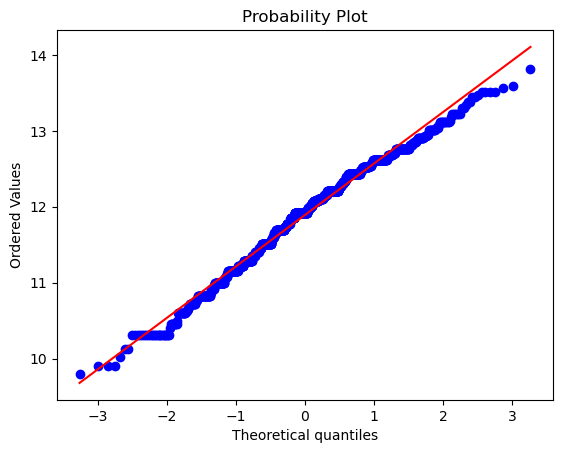

In [6]:
stats.probplot(df_zp_cleaned, dist="norm", plot=plt); #действиельно вышло похоже на нормальное распредление

Проверим нормальность распредения с помощью критерия Крамера-фон Мизеса и Андерсона-Дарлинга

In [7]:
stats.anderson(df_zp_cleaned, dist='norm')

AndersonResult(statistic=4.8094795876040735, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=11.892896448271678, scale=0.6799017799165106)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Статистика теста равна 4.81. Сравним это значение с каждым критическим, соответствующим опредленному уровню значимости. Например:

Критическое значение для α = 0,01 - 1,089. Тестовая статистика превышает это критическое значения, поэтому результаты являются значимыми при уровне значимости 0,01.

Критическое значение для α = 0,025 - 0,915. Тестовая статистика превышает это критическое значение, поэтому результаты являются значимыми при уровне значимости 0,025.

И так далее. Таким образом, тест отклоняет нулевую гипотезу о том, что данные распредлены нормально

In [8]:
# Теперт воспользуемся тестом Колмогорова-Смирнова
stats.kstest(df_zp_cleaned, 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.798127036878302, statistic_sign=-1)

Вывод: QQ-график показывает достаточную нормальность данных, тем не менее тесты довольно уверенно отвергают нулевую гипотезу. В целом, QQ-график показывает, что в хвостах есть отклонения от нормы. Поскольку размер выборки достаточно большой, тесты способны обнаружить даже незначительные отклонения от нормы. Гипотеза достаточно узкая, поэтому даже если она немного ложна, значение p_value будет сходится к 0. В целом, данные взяты не из нормального распредления, но они достаточно нормальны, чтобы использовать для некоторых алгоритмов.

### Гипотеза №2

Равенство ЗП для тех, кто работает удаленно и очно.

$$ H_{0}: = $$
$$ H_{1}: ≠ $$

Используем U-критерий Манна-Уитни. Уровень значимости 0.05

In [9]:
ochno = df[df['Расписание'] == 'fullDay'][:495]['ЗП_сред_RUB']
udal = df[df['Расписание'] == 'remote']['ЗП_сред_RUB']

In [10]:
stats.mannwhitneyu (ochno, udal, alternative='two-sided')

MannwhitneyuResult(statistic=109843.0, pvalue=0.004829332531229576)

**Вывод:** Нулевая гипотеза отклоняется, поскольку p_value меньше уровня значимости. Таким образом, режим работы влияет на уровень ЗП, и мы это подтвердили с помощью теста.

### Гипотеза №3

Теперь проверим тенденцию, которую заметили в визуализации. Соотношение режимов работы fullDay/remote/part-time сохраняется независимо от Локации. Будем использовать Хи-квадрат критерий независимости. Уроверь значимости - 0.05

In [11]:
# Возьмем данные по городам с примерно одинаковым числом наблюдений

check = pd.crosstab(df['Расписание'], df['Локация_2'])[['Екатеринбург', 'Казань', 'Новосибирск']]
check

Локация_2,Екатеринбург,Казань,Новосибирск
Расписание,,,
flexible,3,3,3
fullDay,24,15,25
remote,5,13,12


In [12]:
stats.chi2_contingency(check)

Chi2ContingencyResult(statistic=5.672008568548386, pvalue=0.2250184206903831, dof=4, expected_freq=array([[ 2.7961165 ,  2.70873786,  3.49514563],
       [19.88349515, 19.26213592, 24.85436893],
       [ 9.32038835,  9.02912621, 11.65048544]]))

**Вывод:** p_value больше 0.05, что говорит о том, что нулевая гипотеза не отвергается, и связи между переменными нет

### Гипотеза №4 

Поскольку наши данные достаточно нормальны, да и наблюдений много проверим гипотезу о том, что не менее 40 % вакансий размещенных на hh.ru в сфере IT предлагают трудоустройство в Москве.

$$ H_{0}: p = 0.5 $$
$$ H_{1}: p < 0.5 $$

$$ z_{obs} = \cfrac {\hat {p} - p} {\sqrt {\cfrac {\hat {p} (1 - \hat {p})} {n}}} \overset{asy}{\sim} N(0, 1)$$

Уровень значимости возьмем - 0.05.

In [13]:
p = 0.4
p_est = df[df['Локация_2'] == 'Москва'].shape[0] / df.shape[0]

z_obs = (p_est - p) / pow(p_est * (1 - p_est)/df.shape[0], 1/2) 

alpha = 0.05

z_crit = stats.norm().ppf(1 - alpha)

z_obs > z_crit

True

**Вывод:** гипотеза не отвергается на выбранном уровне значимости, действительно, не менее 40% вакансий по всем городам России приходится на Москву

## Гипотеза №5

Среднее значение ЗП работников IT сферы равно 180.000

$$ H_{0}: \mu = 180000 $$
$$ H_{1}: \mu ≠ 180000 $$

Уровень значимости снова 0.05

In [14]:
# наши данные достаточно нормальны для того, чтобы исполтзовать t_test

stats.ttest_1samp (df['ЗП_сред_RUB'], popmean=180000)

TtestResult(statistic=0.2468248444171078, pvalue=0.8050838942540988, df=1263)

**Вывод:** нулевая гипотеза не отвергается, и мы можем сделать вывод о том, что средняя ЗП примерно равна 180.000